In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv ', encoding='latin1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)  # droping blank columns

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.dropna(inplace=True)

In [18]:
df["Amount"].mean()

np.float64(9453.610857727557)

In [20]:
df['Amount'] = df ['Amount'].replace(np.nan , 9453.610858)

In [21]:
df['Amount'].mean()

np.float64(9453.610857727557)

In [22]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [23]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Gender

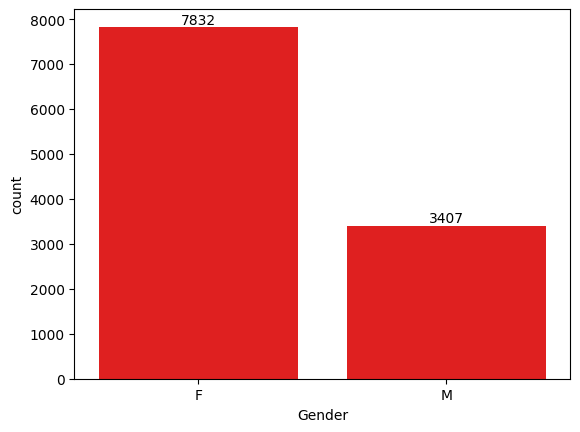

In [39]:
# plotting a bar chart for Gender and it's count
df1 = sns.countplot(x = 'Gender',data = df, color = 'r')

for bars in df1.containers:
    df1.bar_label(bars)


plt.show()

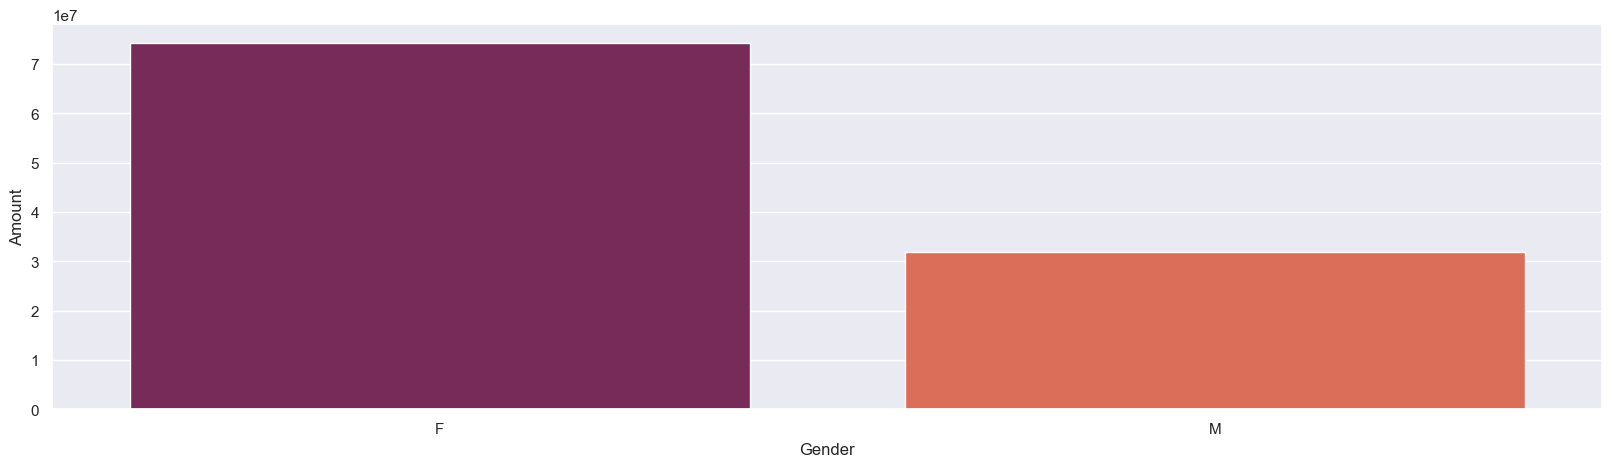

In [118]:
# plotting a bar chart for gender vs total amount

sales_gender = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(
            x = 'Gender', 
            y = 'Amount',  
            data = sales_gender , 
            palette = 'rocket',
            hue = 'Gender', 
            )

plt.show()

# Age Group

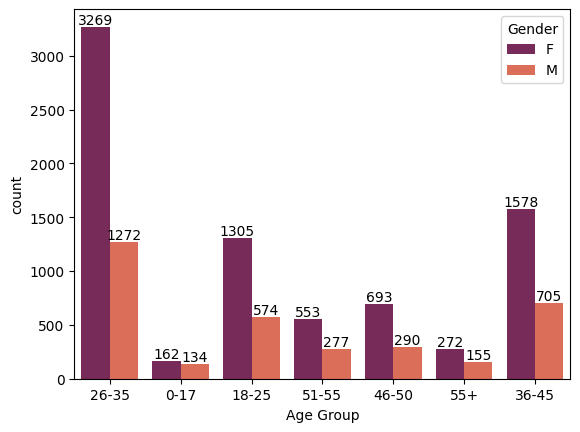

In [54]:
df1 = sns.countplot(x = 'Age Group' , 
              data = df, 
              hue = 'Gender',
              palette = 'rocket',
              
             )

for bars in df1.containers:
    df1.bar_label(bars)

plt.show()

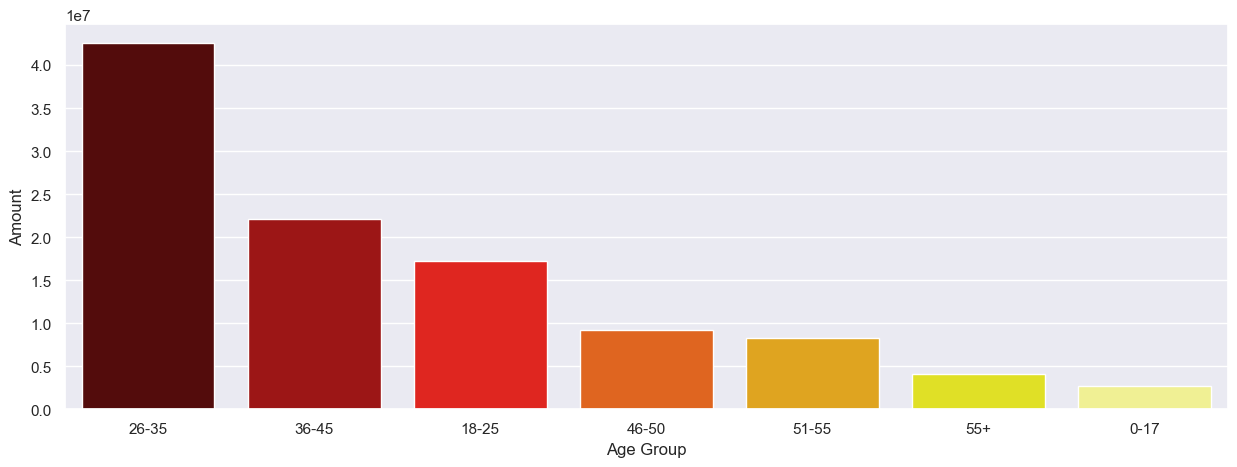

In [87]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',
            y= 'Amount',
            data = sales_age,
            palette = 'hot',
            hue = 'Age Group',
            legend = False
            
           )

plt.show()

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

# State 

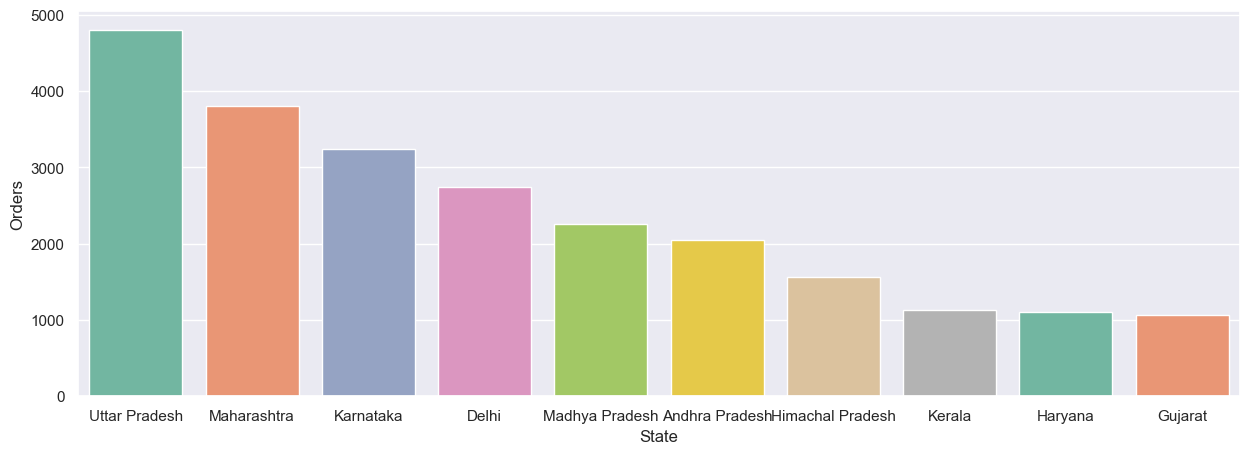

In [86]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(
            x = 'State',
            y= 'Orders',
            data = sales_state,
            palette = 'Set2',
            hue = 'State',
            legend = False
    
           
           )

plt.show()

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

# Marital Status

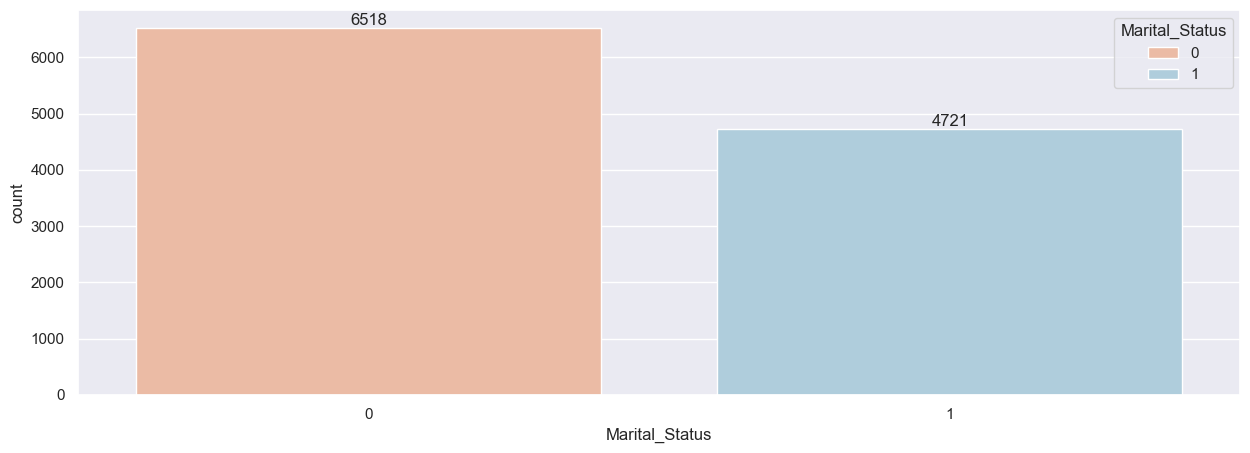

In [93]:
df2 = sns.countplot(

    x = 'Marital_Status',
    data = df,
    palette = 'RdBu',
    hue = 'Marital_Status',
    
)

for var in df2.containers:
    df2.bar_label(var)


plt.show()

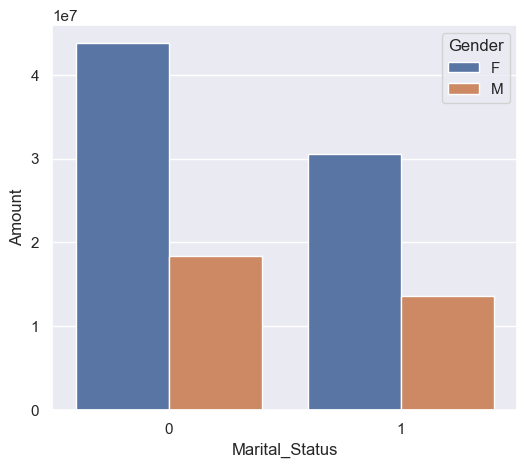

In [95]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(
            x = 'Marital_Status',
            data = sales_state,
            y= 'Amount', 
            hue='Gender'
           )

plt.show()

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

# Occupation

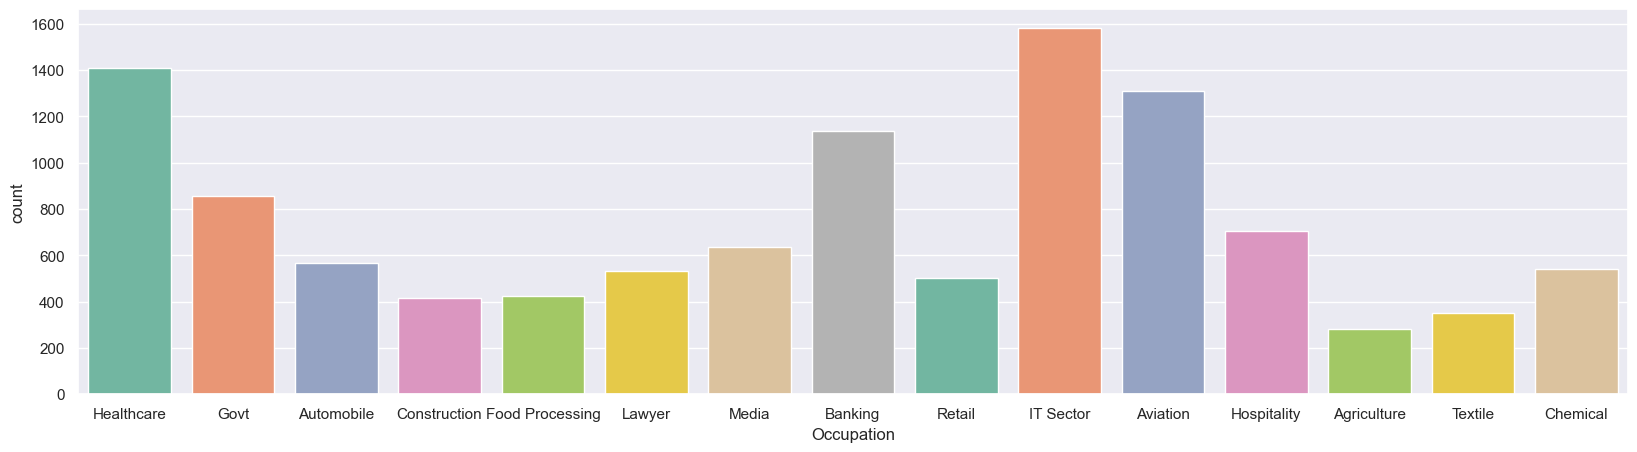

In [104]:
sns.set(rc = {'figure.figsize':(20,5)})
df3 = sns.countplot(

            x = 'Occupation',
            data = df,
            palette = 'Set2',
            hue = 'Occupation'
)

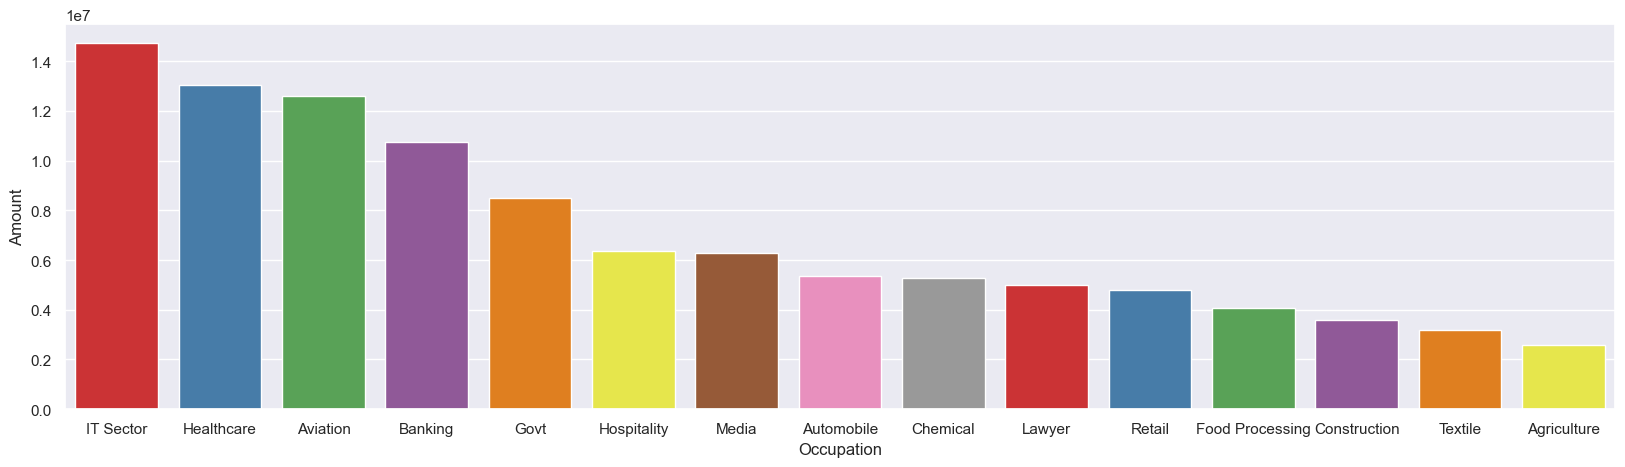

In [106]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(
    x = 'Occupation',
    y= 'Amount',
    data = sales_state, 
    palette = 'Set1',
    hue = 'Occupation'

)

plt.show()

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

# Product Category

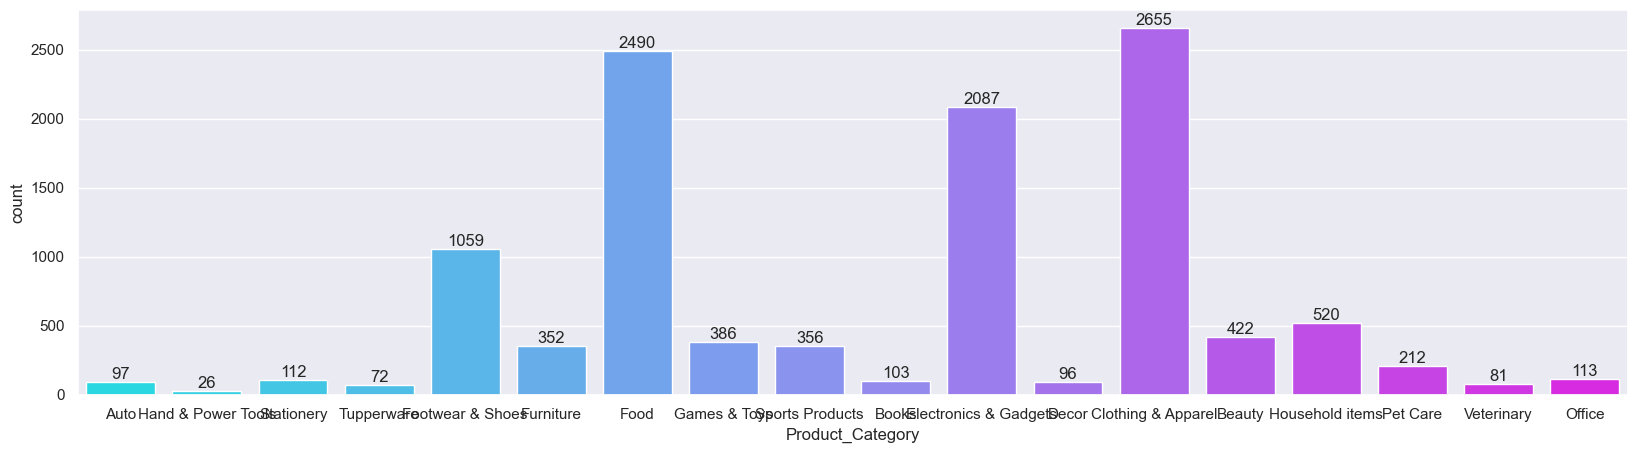

In [113]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(
    x = 'Product_Category',
    data = df,
    palette = 'cool',
    hue = 'Product_Category'
)

for bars in ax.containers:
    ax.bar_label(bars)

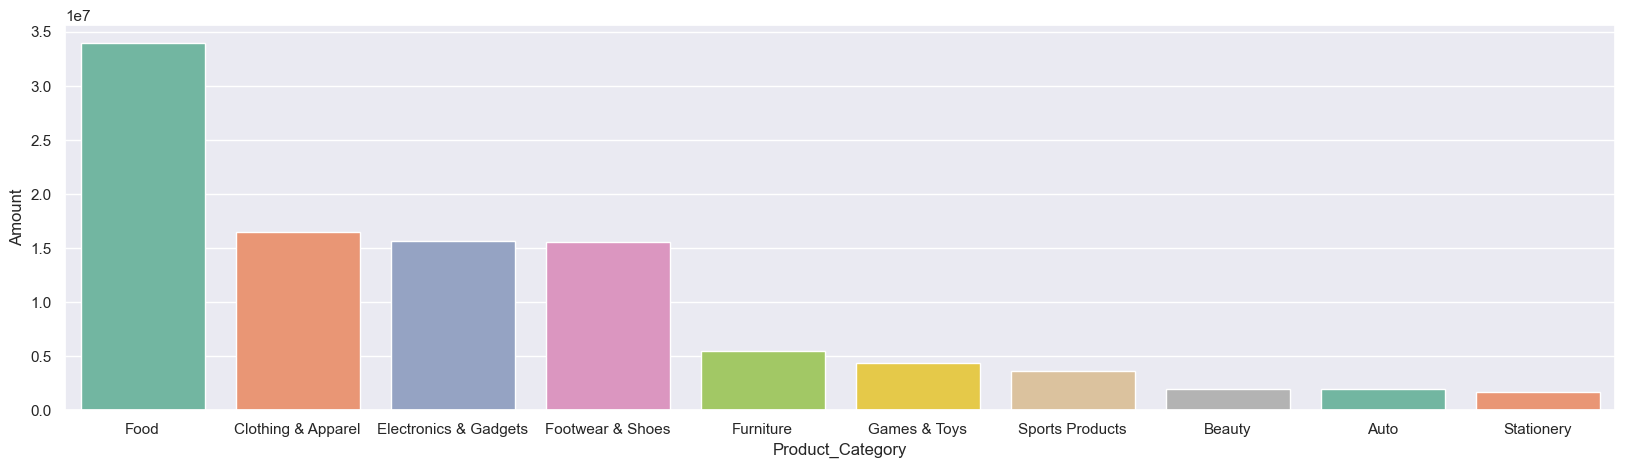

In [115]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(
    x = 'Product_Category',
    y= 'Amount',
    data = sales_state,
    palette = 'Set2',
    hue = 'Product_Category',
)

plt.show()

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

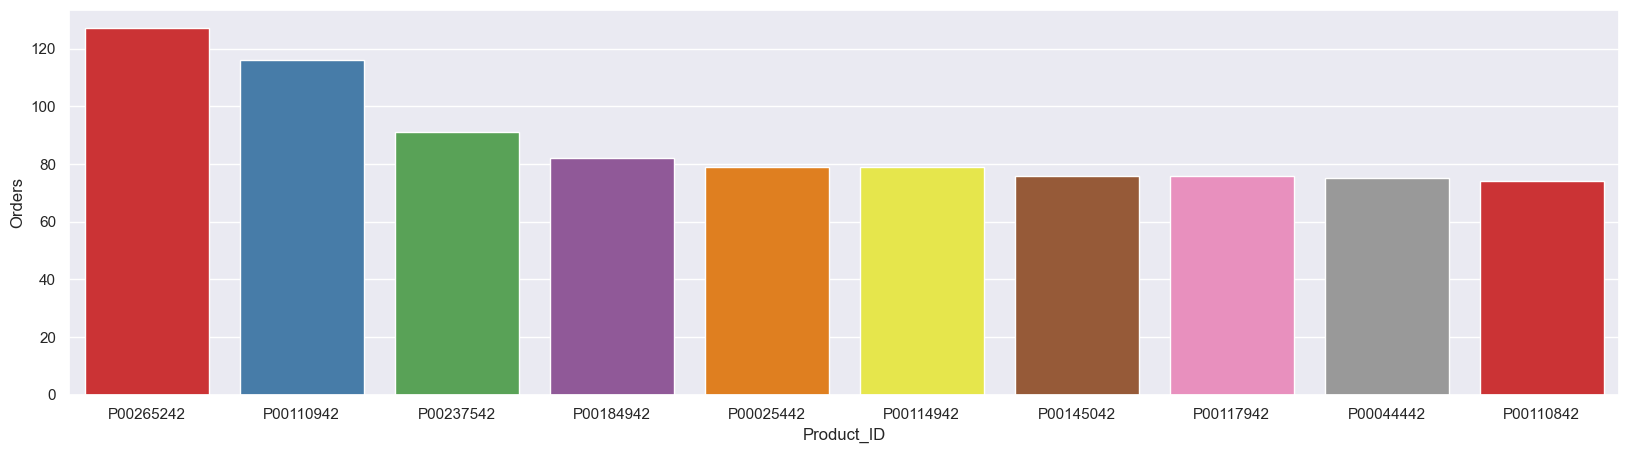

In [121]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(
    x = 'Product_ID',
    y= 'Orders',
    data = sales_state,
    palette = 'Set1',
    hue = 'Product_ID'
)

plt.show()

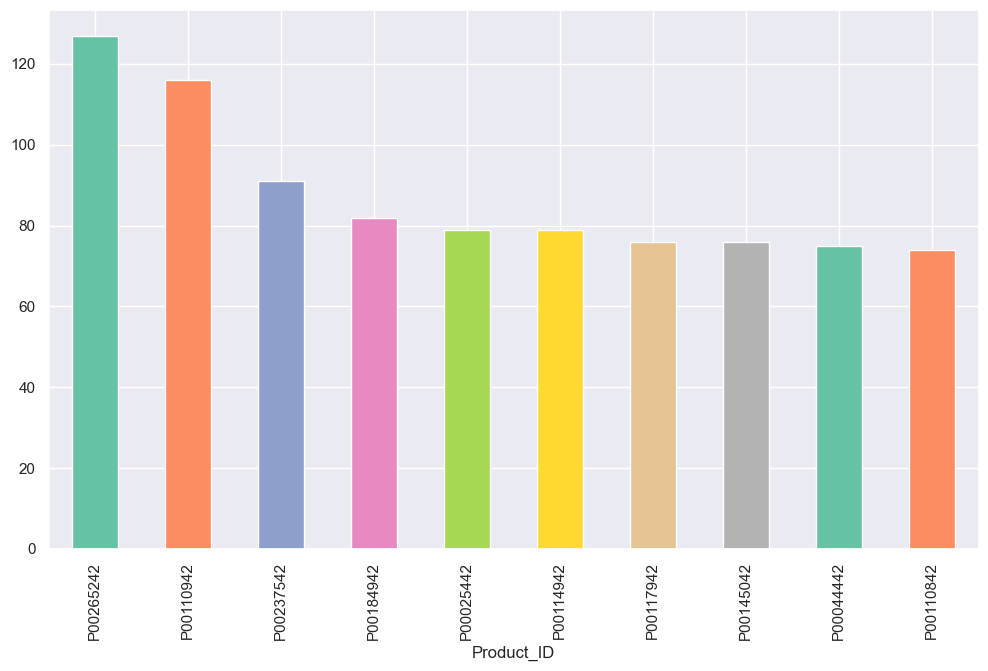

In [131]:
# top 10 most sold products (same thing as above)

fig1, ax = plt.subplots(figsize=(12, 7))

# Get the top 10 products by number of orders
top_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)

# Define a color palette
palette = sns.color_palette("Set2", n_colors=len(top_products))

# Create a bar plot with the specified colors
top_products.plot(kind='bar', ax=ax, color=palette)


plt.show()

Conclusion
The analysis reveals that married women aged 26-35 from Uttar Pradesh, Maharashtra, and Karnataka exhibit strong purchasing tendencies towards specific product categories. This demographic, primarily employed in the IT, Healthcare, and Aviation sectors, shows a pronounced interest in buying products from the Food, Clothing, and Electronics categories.

These insights suggest a targeted marketing opportunity for businesses aiming to engage this consumer group. By focusing on the preferences and needs of these women, companies can enhance their marketing strategies and product offerings to better align with the purchasing behaviors of this influential demographic.